In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt

### Creating constants to be used ahead

In [2]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNELS=3 #RGB
epochs=50

### load Data into datset

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Potato",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

<Detail>The length here is 68 because it means <b>68 batches of 68*32 images</b> further below for loop has shown the details by travesing through a single batch.</Detail>

In [6]:
for image_batch,label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 2 1 0 0 0 1 0 0 1 1 1 0 0]


<detail>to print details o a single image</detail>

In [7]:
for image_batch,label_batch in dataset.take(1):
    #print(image_batch[0].numpy())
    print(image_batch[0].shape)

(256, 256, 3)


<detail><b>to display an image we use the loop below</b></detail>

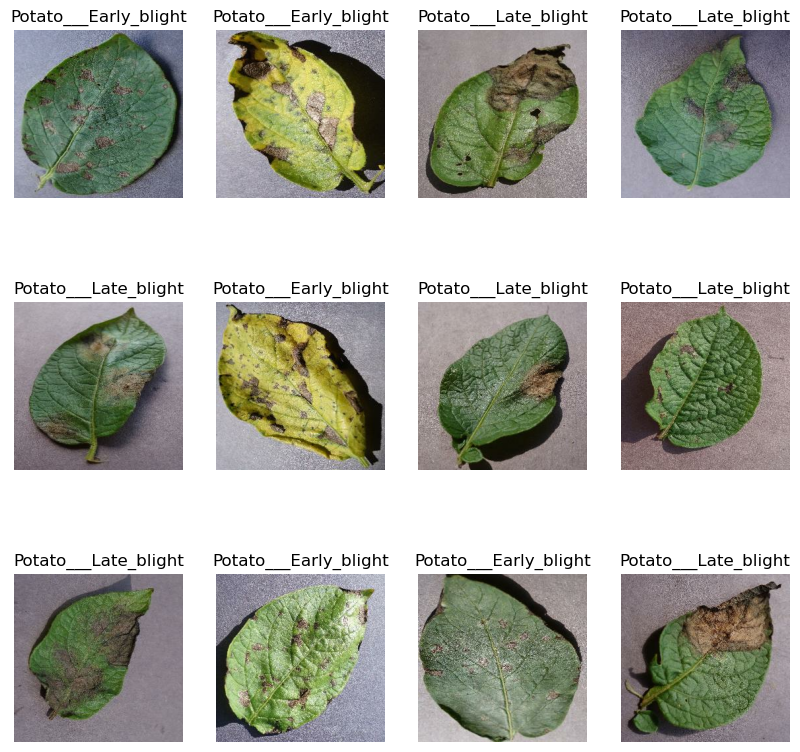

In [8]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
    for i  in range (12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")

<DETAIL>Dataset Split is 75 - training, 15 - Validation, 10 - testing</DETAIL>

In [9]:
train_size=0.75
len(dataset)*train_size

51.0

In [10]:
train_ds = dataset.take(51)
len(train_ds)

51

In [11]:
temp_ds=dataset.skip(51)

In [12]:
val_size=0.15
len(dataset)*val_size

10.2

In [13]:
val_ds=temp_ds.take(10)
len(val_ds)

10

In [14]:
test_ds=temp_ds.skip(10)
len(test_ds)

7

### Train test Split Function

In [15]:
def get_dataset_partitions_tf(ds,train_split=0.75,val_split=0.15,test_split=0.1,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds = dataset.take(train_size)
    val_ds = dataset.skip(train_size).take(val_size)
    test_ds = dataset.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds

In [16]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(dataset)

In [17]:
print(len(train_ds))

51


In [18]:
print(len(val_ds))

10


In [19]:
print(len(test_ds))

7


In [20]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

### Data Augmentation

In [21]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0 / 255)
])

In [22]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
])

### Building the CNN Model

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Input shape (without batch size)
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)  # (height, width, channels)
n_classes = 3

# Define the input layer explicitly using tf.keras.Input
inputs = tf.keras.Input(shape=input_shape)

# Apply the resize_and_rescale preprocessing layer
x = resize_and_rescale(inputs)  # Assumed resize_and_rescale is already defined

# Apply the data_augmentation layer
x = data_augmentation(x)  # Assumed data_augmentation is already defined

# Now start building the convolutional layers
x = layers.Conv2D(32, (3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

x = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')(x)
x = layers.MaxPooling2D((2, 2))(x)

# Flatten the output before passing to Dense layers
x = layers.Flatten()(x)
x = layers.Dense(64, activation="relu")(x)
output = layers.Dense(n_classes, activation="softmax")(x)

# Create the model using the functional API (explicit input and output layers)
model = tf.keras.Model(inputs=inputs, outputs=output)


In [24]:
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 12, 12, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

In [26]:
history = model.fit(
    train_ds,
    epochs=epochs,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 33s 584ms/step - accuracy: 0.4543 - loss: 0.9433 - val_accuracy: 0.6000 - val_loss: 0.8766
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 566ms/step - accuracy: 0.5783 - loss: 0.8469 - val_accuracy: 0.7500 - val_loss: 0.5838
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 574ms/step - accuracy: 0.7831 - loss: 0.5361 - val_accuracy: 0.8219 - val_loss: 0.4330
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 568ms/step - accuracy: 0.8580 - loss: 0.3716 - val_accuracy: 0.8844 - val_loss: 0.3548
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 571ms/step - accuracy: 0.8566 - loss: 0.3568 - val_accuracy: 0.9094 - val_loss: 0.2610
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 573ms/step - accuracy: 0.9165 - loss: 0.2133 - val_accuracy: 0.9406 - val_loss: 0.1419
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 575ms/step - accuracy: 0.9369 - loss: 0.1608 - val_accuracy: 0.8531 - val_loss: 0.4195
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 29s 574ms/step - accuracy: 0.9091 - loss: 0.2357 - val_accu

In [27]:
scores = model.evaluate(test_ds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.9909 - loss: 0.0353


In [28]:
history

In [29]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 51}

In [30]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [31]:
acc=history.history['accuracy']
loss=history.history['loss']
val_acc=history.history['val_accuracy']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training & Validation Loss')

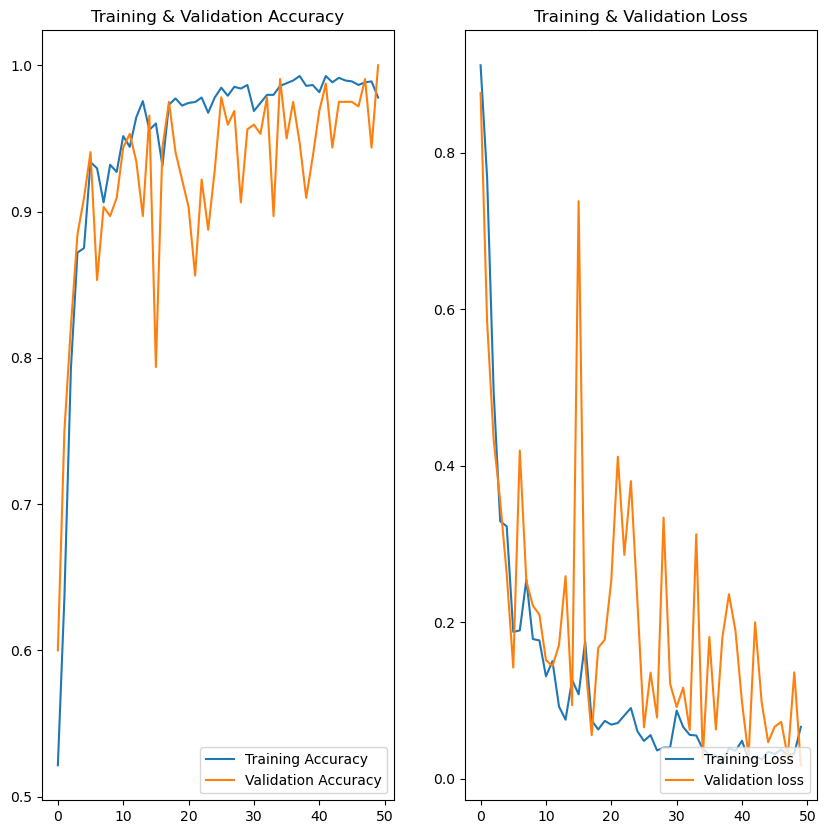

In [32]:
plt.figure(figsize=(10,10))
plt.subplot(1,2,1)
plt.plot(range(epochs),acc,label='Training Accuracy')
plt.plot(range(epochs),val_acc,label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training & Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs),loss,label='Training Loss')
plt.plot(range(epochs),val_loss,label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training & Validation Loss')

### make inferences/Prediction on the images

First Image to Predict
actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
Predicted Label: Potato___Early_blight


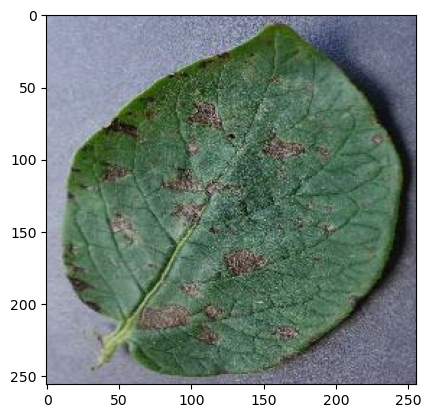

In [40]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
    first_image=image_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()

    print ("First Image to Predict")
    plt.imshow(first_image)
    print("actual label : ",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [41]:
def predict(model,img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0) # creating a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 *(np.max(predictions[0])),2)
    return predicted_class,confidence

### Running prediction on a batch of my(User Choice)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


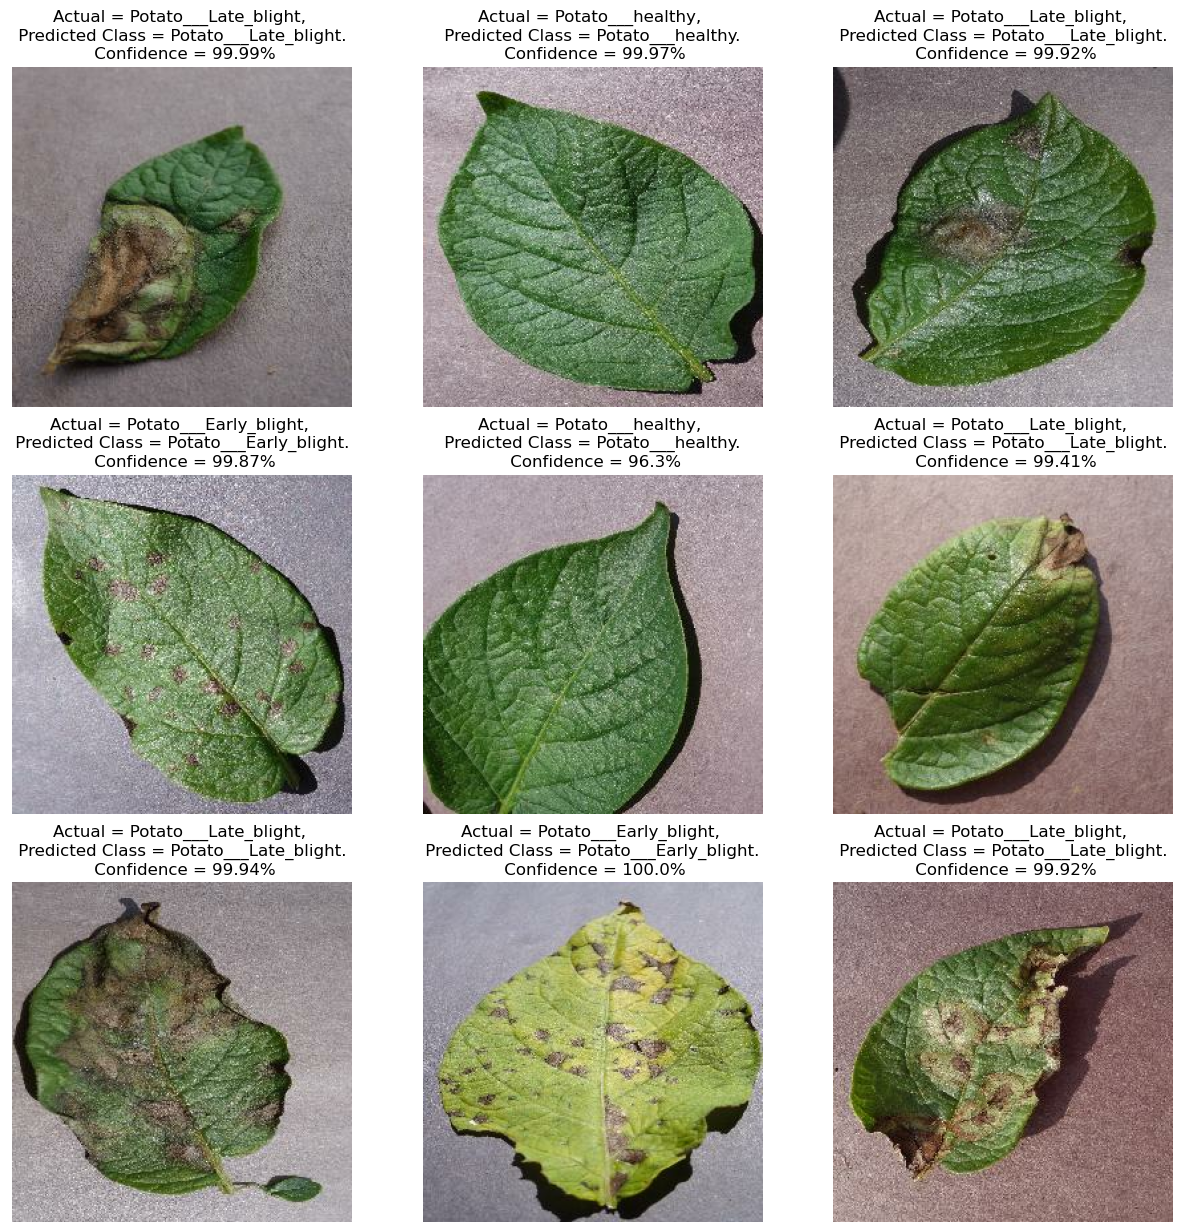

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(2):
    # Ensure we don't exceed the number of images in the batch
    num_images = min(9, images.shape[0])  # Ensure we only use up to 9 images or the batch size
    
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))  # Convert tensor to numpy array
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual = {actual_class}, \n Predicted Class = {predicted_class}. \n Confidence = {confidence}%")
        plt.axis("off")

plt.show()


### Saving the model

In [43]:
model_version = 2


In [50]:
import os
model_version=max([int (i) for i in os.listdir("C:/Users/GIM/Desktop/Rishi/Classification_App/saved_models")+[0]])+1
# Save model as a SavedModel for export
model.export(f"C:/Users/GIM/Desktop/Rishi/Classification_App/saved_models/{model_version}")

INFO:tensorflow:Assets written to: C:/Users/GIM/Desktop/Rishi/Classification_App/saved_models/2\assets


INFO:tensorflow:Assets written to: C:/Users/GIM/Desktop/Rishi/Classification_App/saved_models/2\assets


Saved artifact at 'C:/Users/GIM/Desktop/Rishi/Classification_App/saved_models/2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  1788955202512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955202704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955204816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955205968: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955206160: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955207120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955206736: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955207696: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955206544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1788955208080: TensorSpec(shape=(), dtype=tf.resource, nam